In [5]:
library(TESS)
library(NELSI)

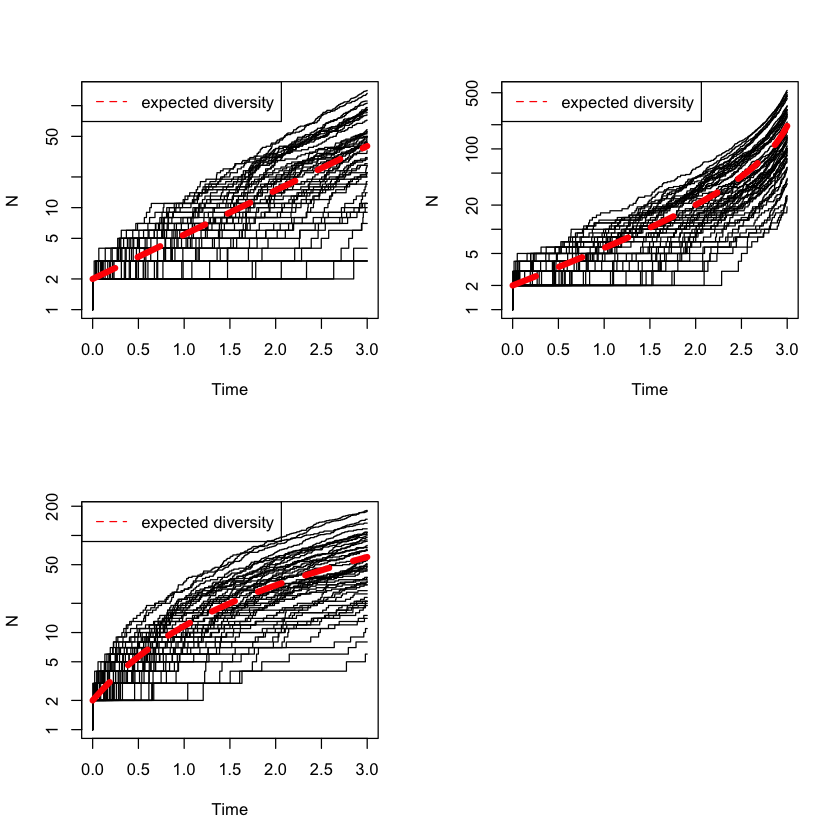

In [62]:
par(mfrow = c(2, 2))

speciation <- 1.0
extinction <- 0.0
tmrca <- 3.0
trees <- tess.sim.age(n = 50, age = tmrca, lambda = speciation, mu = extinction, MRCA = T)
mltt.plot(trees, log = 'y', legend = F, backward = F, dcol = F)

expected <- function(t)
    tess.nTaxa.expected(begin = 0, t = t, end = tmrca, 
            lambda = speciation, mu = extinction, MRCA = T, reconstructed = T)
    curve(expected, add = T, col = 'red', lty = 2, lwd = 5)
    legend('topleft', col= 'red', lty = 2, 'expected diversity')
    

speciation <- 5
extinction <- 4
tmrca <- 3.0

trees <- tess.sim.age(n = 50, age = tmrca, lambda = speciation,
                     mu = extinction, MRCA = T)
mltt.plot(trees, log = 'y', legend = F, backward = F, dcol = F)
expected <- function(t)
    tess.nTaxa.expected(begin = 0, t = t, end = tmrca, 
            lambda = speciation, mu = extinction, MRCA = T, reconstructed = T)
    curve(expected, add = T, col = 'red', lty = 2, lwd = 5)
    legend('topleft', col= 'red', lty = 2, 'expected diversity')


speciation <- function(t) 0.5 + 2*exp(-1*t)
extinction <- 0
tmrca <- 3
trees <- tess.sim.age(n = 50, age = tmrca, lambda = speciation, 
                     mu = extinction, MRCA = T)
mltt.plot(trees, log = 'y', legend = F, backward = F, dcol = F)
expected <- function(t)
    tess.nTaxa.expected(begin = 0, t = t, end = tmrca, 
            lambda = speciation, mu = extinction, MRCA = T, reconstructed = T)
    curve(expected, add = T, col = 'red', lty = 2, lwd = 5)
    legend('topleft', col= 'red', lty = 2, 'expected diversity')

In [63]:
# set up priors
prior_delta <- function(x) dexp(x, rate = 10, log = T)
prior_tau <- function(x) dexp(x, rate = 10, log = T)
priorsConstBD <- c('diversification'=prior_delta, 'turnover'=prior_tau)

In [66]:
likelihoodConstBD <- function(params){
    speciation <- params[1] + params[2]
    extinction <- params[2]
    lnl <- tess.likelihood(times, lambda = speciation, 
                          mu = extinction, 
                        samplingProbability = 1, log = T)
    lnl
}

In [72]:
set.seed(1235)
times <- intnode.times(trees[[1]])
samplesConstBD <- tess.mcmc(likelihoodFunction = likelihoodConstBD, 
                           priors = priorsConstBD, 
                           parameters = runif(2, 0, 1),
                           logTransforms = c(T, T),
                           delta = c(1, 1),
                           iterations = 2000,
                           thinning = 10,
                           adaptive = T,
                           verbose = T)

Burning-in the chain ...
0--------25--------50--------75--------100
Finished burnin period!

Running the chain ...
0--------25--------50--------75--------100
Finished MCMC!

Parameter | delta | Acceptance Probability
diversification		| 0.674		| 0.502
turnover		| 2.171		| 0.377


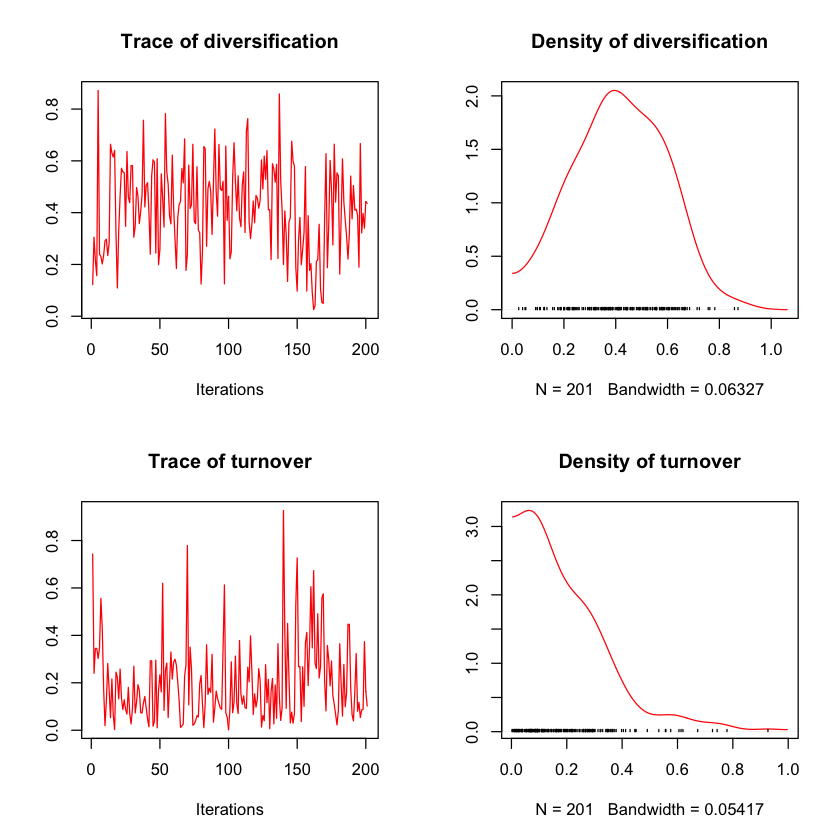

In [74]:
plot(samplesConstBD, col = 'red')